<a href="https://colab.research.google.com/github/SeungHuiHan/Example-of-linear-regression-using-tensor-flow/blob/master/Linear_regression_model_using_tensor_flow_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

https://childult-programmer.tistory.com/51

In [1]:
#인공신경망 모델 구축하고 예측 성능 관찰
#실습 데이터: 총 10가지 종류에 대한 의류 이미지를 기록한 데이터셋->의류 종류 예측
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

Fashion MNIST 데이터세트

Label     Category

0         티셔츠/상의

1         바지

2         스웨터

3         드레스

4         코트

5         샌들

6         셔츠

7         운동화

8         가방

9         부츠

In [2]:
# Fashion MNIST 데이터셋 로딩
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [4]:
train_X.shape#28x28픽셀로 표현된 60000개의 train 샘플

(60000, 28, 28)

In [5]:
test_X.shape#28x28픽셀로 표현된 10000개의 train 샘플

(10000, 28, 28)

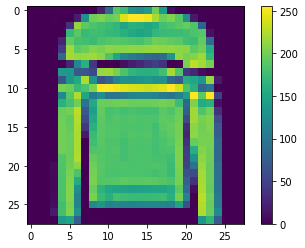

In [6]:
#픽셀 값의 범위가 0~255 사이인것을 알 수 있음
plt.figure()
plt.imshow(train_X[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
# 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

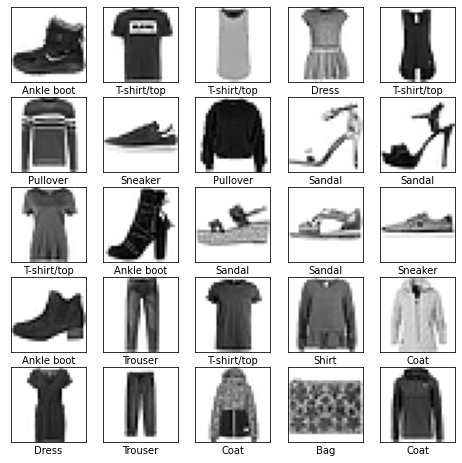

In [8]:
#train set에서 처음 25개 이미지와 그 아래 클래스 이름을 출력
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Y[i]])
plt.show()

In [81]:
# Fashion MNIST 분류를 위한 CNN 모델 정의
model = Sequential([
    # 특징 추출기 (Feature Extractor)
    Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),#28*28픽셀을 1차원으로 계산 # kernel_size : 연산을 수행할 때 윈도우의 크기를 의미
    MaxPool2D(strides=(2, 2)),                                                                  #filters : 몇 개의 다른 종류의 필터를 활용할 것인지를 나타냄. 출력 모양의 깊이(depth) 를 결정
    Conv2D(kernel_size=(3, 3), filters=64),                          #strides : 연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미(디폴트 = 1)
    MaxPool2D(strides=(2, 2)),
    Conv2D(kernel_size=(3, 3), filters=128),
    MaxPool2D(strides=(2, 2)),
    # 다차원 이미지 => 1차원
    Flatten(), # Flattn은 3차원 배열(가로,세로,컬러)인 이미지를 1차원 배열로 바꿔준다.
    # 분류기 (Classifier)
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    # Dense(units=128, activation='relu'),
    Dropout(rate=0.3),  # Dropout()는 특정 노드에 학습이 지나치게 몰리는 것을 방지하기 위해 랜덤하게 일부 노드를 꺼준다.
    Dense(units=10, activation='softmax') #softmax함수: 다중 클래스 분류 문제에서 출력층에 주로 쓰인다.
])

# 모델 학습 과정 설정
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 1, 1, 128)      

In [82]:
# 모델 학습
history = model.fit(train_X, train_Y, epochs=50,batch_size=32, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')],validation_split=0.25,verbose=1)
# verbose : 학습 중 출력되는 문구를 설정한다.
# 0 : 아무 것도 출력하지 않는다.
# 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.
# 2 : 미니 배치마다 손실 정보를 출력한다.

Epoch 1/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.6199 - accuracy: 0.7769 - val_loss: 0.4578 - val_accuracy: 0.8301
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4207 - accuracy: 0.8473 - val_loss: 0.4101 - val_accuracy: 0.8502
Epoch 3/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3621 - accuracy: 0.8688 - val_loss: 0.3548 - val_accuracy: 0.8704
Epoch 4/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.3207 - accuracy: 0.8828 - val_loss: 0.3492 - val_accuracy: 0.8715
Epoch 5/50
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2909 - accuracy: 0.8933 - val_loss: 0.3305 - val_accuracy: 0.8833
Epoch 6/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.2654 - accuracy: 0.9016 - val_loss: 0.3547 - val_accuracy: 0.8785
Epoch 7/50
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2441 - accuracy: 0.9094 - val_loss: 0.3372 - val_ac

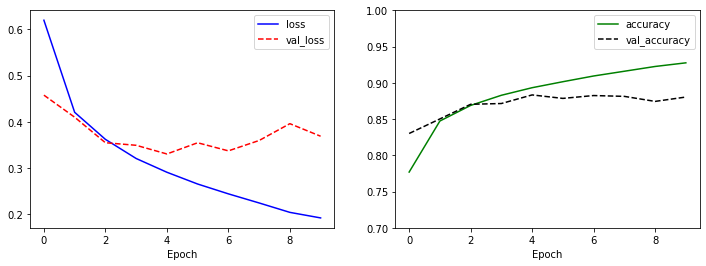

In [83]:
#회귀 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [84]:
# 모델 평가
print(model.evaluate(test_X, test_Y, verbose=0))

[0.37038105726242065, 0.8805000185966492]


In [85]:
test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3704 - accuracy: 0.8805 - 983ms/epoch - 3ms/step

Test accuracy: 0.8805000185966492


In [86]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [87]:
predictions = probability_model.predict(test_X)

In [88]:
predictions[0]

array([0.08533743, 0.08533743, 0.08533743, 0.08533743, 0.08533743,
       0.08533766, 0.08533743, 0.08534183, 0.08533743, 0.2319585 ],
      dtype=float32)

In [89]:
import numpy as np
import pandas as pd

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

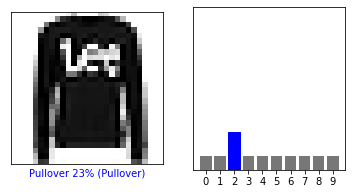

In [90]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_Y, test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_Y)
plt.show()